# Observable Trends

1. The New York Times has the least negative results.
2. BBC has the most negative results, followed by Fox.
3. On the day the sentiment analysis was done (9/11/2018) the overall sentiment is negative, over the past 2 days while working on the code, a very different overall sentiment was observed. The results obtained today are not surprising considering a lot of the tweets were related to 9/11 remembrance date and on top of that, hurricane Florence heading to the East coast.

In [1]:
# import dependencies 
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# import and initialize sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# set twitter api keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# setup Tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# set variable for target users
target_users = ("BBCBreaking","CBSNews","CNN","FoxNews","nytimes")

# create empty list to store the results gathered in the dictionary 
results_list = []

# create loop to loop through all the users in target users
for user in target_users:
    # create variables to store results from sentiment analyzer
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    
    # set counter to store Tweets Ago
    counter = 0
    
    # create a forloop to run the code 5 times, therefore getting 100 tweets from each user
    for x in range(5):
        public_tweets = api.user_timeline(user, page=x, result_type="recent")
        
        # create a nested forloop to run the sentiment analyzer on each tweet 
        for tweet in public_tweets:  
            results = analyzer.polarity_scores(tweet["text"])
            
            # create variable to extract sentiments analysis
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # after performin all the loops above, the counter will add 1 to the counter
            # initially set to zero
            counter += 1
            
            # create a dictionary will all the sentiment analysis and append
            # to results_list that was set to empty initally
            results_list.append({
                "News Media": user,
                "Date":tweet["created_at"],
                "Compound": compound,
                "Positive": pos,
                "Neutral": neu,
                "Negative": neg,
                "Tweets Ago": counter,
                "Tweet":tweet["text"]})
            
            
            

In [4]:
# create a dataframe with the list of dictionaries created
df = pd.DataFrame(results_list)

# reorder the columns orders for easier visualization
results_df =df[["News Media","Date","Tweets Ago","Compound","Positive","Neutral","Negative","Tweet"]]
results_df


,News Media,Date,Tweets Ago,Compound,Positive,Neutral,Negative,Tweet
0,BBCBreaking,Tue Sep 11 16:30:50 +0000 2018,1,0.6580,0.154,0.846,0.000,RT @bbctms: WICKET!\nThere it is! Anderson cle...
1,BBCBreaking,Tue Sep 11 09:21:43 +0000 2018,2,0.5267,0.152,0.848,0.000,RT @BBCSport: Uefa plans to introduce a third ...
2,BBCBreaking,Tue Sep 11 08:35:00 +0000 2018,3,-0.4404,0.000,0.828,0.172,"UK unemployment fell by 55,000 in the three mo..."
3,BBCBreaking,Mon Sep 10 14:09:41 +0000 2018,4,0.0000,0.000,1.000,0.000,England's leading Test run scorer Alastair Coo...
4,BBCBreaking,Mon Sep 10 11:45:36 +0000 2018,5,0.4374,0.107,0.893,0.000,RT @bbctms: THERE IT IS!\nWhat a moment for Al...
5,BBCBreaking,Sun Sep 09 18:09:57 +0000 2018,6,0.6249,0.282,0.718,0.000,Sweden's far right makes gains in election as ...
6,BBCBreaking,Sun Sep 09 17:03:42 +0000 2018,7,-0.8555,0.000,0.580,0.420,28-year-old woman charged with attempted murde...
7,BBCBreaking,Sat Sep 08 21:47:17 +0000 2018,8,0.8402,0.340,0.577,0.083,Naomi Osaka beats Serena Williams 6-2 6-4 to w...
8,BBCBreaking,Sat Sep 08 17:02:27 +0000 2018,9,-0.9231,0.000,0.530,0.470,"Woman, 28, arrested after man stabbed in Barns..."
9,BBCBreaking,Sat Sep 08 09:38:43 +0000 2018,10,-0.7184,0.000,0.760,0.240,One person arrested after reports man had been...


In [5]:
# Save dateframe to csv file
results_df.to_csv("news_media_sentiment.csv")

In [6]:
# create x and y axis to be plotted 

# create variable to call for BBC, using loc select only the column
# with news media, the variable will only retrieve data when News Media is equal to BBCBreaking
# will user the new dataframe to extract tweets ago and the compound for each tweet to be ploted
bbc = df.loc[df["News Media"] == "BBCBreaking",:]
bbc_x = bbc["Tweets Ago"]
bbc_y = bbc["Compound"]

# create variable to call for CBS, using loc select only the column
# with news media, the variable will only retrieve data when News Media is equal to CBSNews
# will user the new dataframe to extract tweets ago and the compound for each tweet to be ploted
cbs = df.loc[df["News Media"] == "CBSNews",:]
cbs_x = cbs["Tweets Ago"]
cbs_y = cbs["Compound"]

# create variable to call for CNN, using loc select only the column
# with news media, the variable will only retrieve data when News Media is equal to CNN
# will user the new dataframe to extract tweets ago and the compound for each tweet to be ploted
cnn = df.loc[df["News Media"] == "CNN",:]
cnn_x = cnn["Tweets Ago"]
cnn_y = cnn["Compound"]

# create variable to call for Fox, using loc select only the column
# with news media, the variable will only retrieve data when News Media is equal to FoxNews
# will user the new dataframe to extract tweets ago and the compound for each tweet to be ploted
fox = df.loc[df["News Media"] == "FoxNews",:]
fox_x = fox["Tweets Ago"]
fox_y = fox["Compound"]

# create variable to call for NY Times, using loc select only the column
# with news media, the variable will only retrieve data when News Media is equal to nytimes
# will user the new dataframe to extract tweets ago and the compound for each tweet to be ploted
nytimes = df.loc[df["News Media"] == "nytimes",:]
nytimes_x = nytimes["Tweets Ago"]
nytimes_y = nytimes["Compound"]


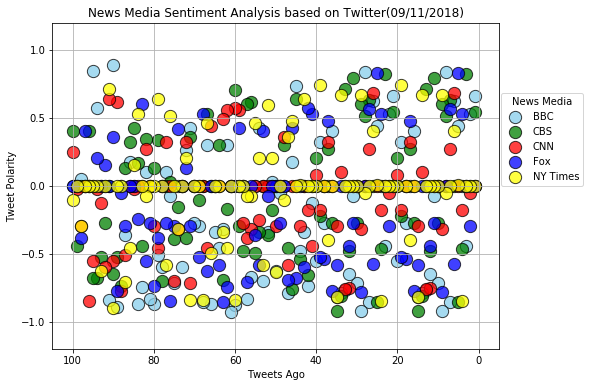

In [7]:
# select size of plot for better visualization
plt.figure(figsize=(8,6))

# create individual scatter plot for each news media with the variables created above
plt.scatter(bbc_x,bbc_y, c="skyblue", label="BBC", edgecolor="black",s=150,alpha=0.75)
plt.scatter(cbs_x,cbs_y, c="green", label="CBS", edgecolor="black",s=150,alpha=0.75)
plt.scatter(cnn_x,cnn_y, c="red", label="CNN", edgecolor="black",s=150,alpha=0.75)
plt.scatter(fox_x,fox_y, c="blue", label="Fox", edgecolor="black",s=150,alpha=0.75)
plt.scatter(nytimes_x,nytimes_y, c="yellow", label="NY Times", edgecolor="black",s=150,alpha=0.75)

# add title, labels, e set limits
plt.title(f"News Media Sentiment Analysis based on Twitter(09/11/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(105,-5,20)
plt.ylim(-1.2,1.2,0.5)

# add grid lines 
plt.grid()

# add legend in a outside box for a cleaner look
plt.legend(bbox_to_anchor=[1.2, 0.8], title="News Media")

# save image and png
plt.savefig("media_sentiment_analysis.png")

plt.show()


In [8]:
# group the results_df by News Media to obtain the mean of values
grouped = results_df.groupby("News Media").mean()

# define color for each News Media, following the same colors used on the scatter plot
colors="skyblue","green","red","blue","yellow"

# define x axis by getting the range of lenght of the unique values in News Media
x_axis = np.arange(len(results_df["News Media"].unique()))
# y axis is the mean of the compounds
y_axis = grouped["Compound"]
# the ticks for x axis set using tick locations 
names=results_df["News Media"].unique()
tick_locations = [name for name in x_axis]


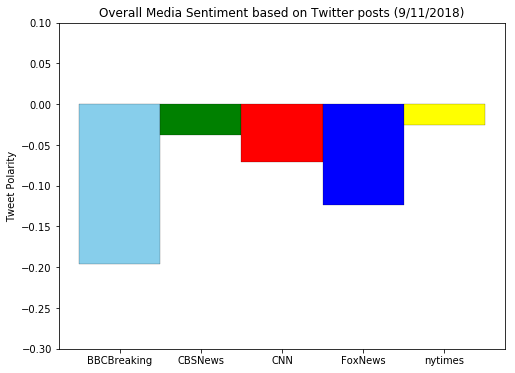

In [9]:
# define plot size
plt.figure(figsize=(8,6))
# plot a bar chart calling the x and y axis, colors defined, formattin columns sizes too
plt.bar(x_axis,y_axis,color=colors,width=1,edgecolor="black",linewidth=0.2)
# plot the ticks for x axis
plt.xticks(tick_locations,names)
# define limit for y axis
plt.ylim(-.3,.1)
# set titles and label
plt.title("Overall Media Sentiment based on Twitter posts (9/11/2018)")
plt.ylabel("Tweet Polarity")
# save plot as png
plt.savefig("overall_media_sentiment.png")

plt.show()